# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\DEX\AppData\Local\Temp\ipykernel_26428\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


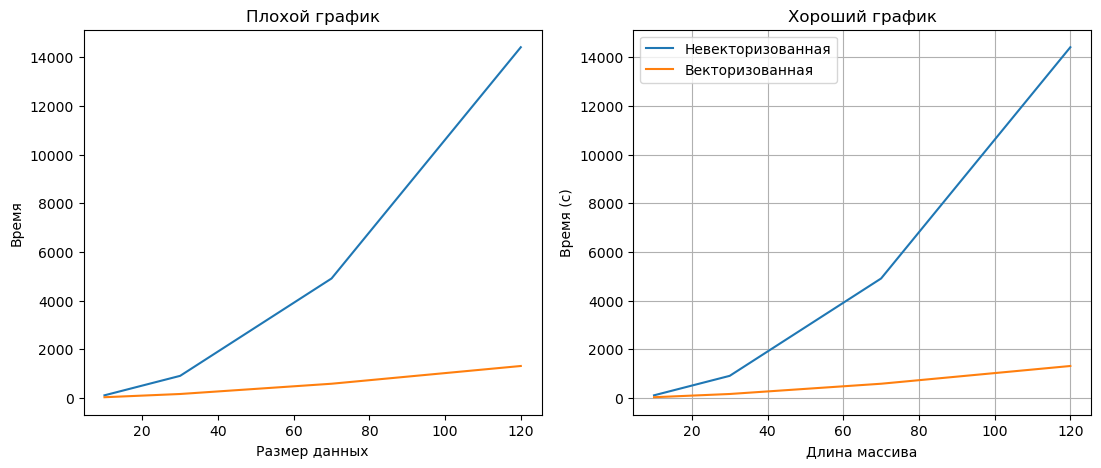

In [369]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [370]:
def prod_non_zero_diag(a):
    ans = 1

    n = len(a) - 1
    m = len(a[0]) - 1

    x = 0
    y = 0

    while (x <= n and y <= m):
        if (a[x][y] != 0):
            ans *= a[x][y]
        x += 1
        y += 1


    return ans

In [371]:
def prod_non_zero_diag_vect(a):
    return np.prod(np.diag(a)[np.diag(a)!=0])

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [372]:
def are_multisets_equal(a, b):
    if(len(a) != len(b)):
        return False
    a.sort()
    b.sort()
    for i in range(len(a)):
        if(a[i] != b[i]):
            return False
    return True

In [373]:
def are_multisets_equal_vect(a, b):
    if (len(a) != len(b)):
        return False
    return np.all(np.sort(a)==np.sort(b))

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [374]:
def max_after_zero(a):
    mx = -1
    for i in range(1, len(a)):
        if (a[i - 1] == 0 and a[i] > mx):
            mx = a[i]

    return mx

In [375]:
def max_after_zero_vect(a):
    return (a[1:][(a==0)[:-1]])

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [376]:
def convert_image(img, coefs):
    n = len(img)
    m = len(img[0])
    res = list()
    for i in range(n):
        h = list()
        for j in range(m):
            h.append(0)
            for k in range(len(coefs)):
                h[-1] += img[i][j][k] * coefs[k]
        res.append(h)
            
    return img

In [377]:
def convert_image_vect(img, coefs):
    return np.sum(img * coeff, axis=-1)

C:\Users\DEX\AppData\Local\Temp\ipykernel_26428\1010530589.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


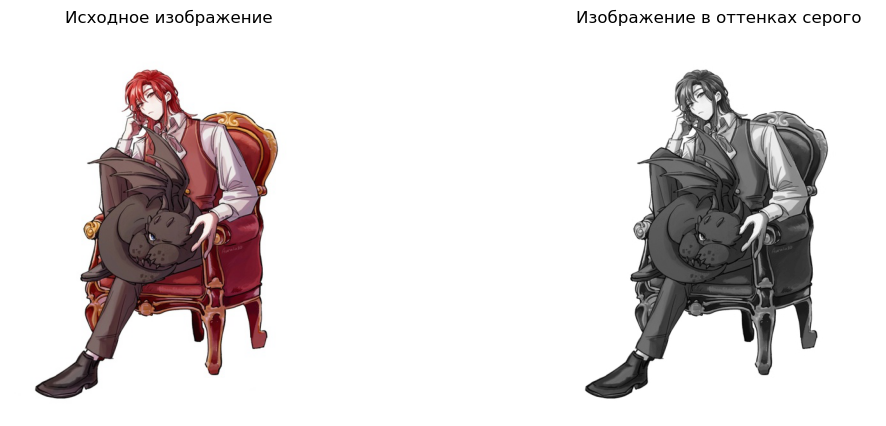

In [378]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import numpy as np

%matplotlib inline

img = imread('C:/Users/DEX/Desktop/task/Cale.jpg')
coeff = np.array([0.299, 0.587, 0.114])
img_grey = convert_image_vect(img, coeff)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.imshow(img)
ax1.set_title('Исходное изображение')
ax1.axis('off')
ax2.imshow(img_grey, cmap='gray')
ax2.set_title('Изображение в оттенках серого')
ax2.axis('off')

fig.show()

In [379]:
'''Этот код (вывод изображения) я тоже списала (ссылку см. ниже), но я разобралась в нем.
Функция imread() считывает изображение из данного пути. Затем изображение конвертируется с помощью функции 
convert_image_vect(). Затем задаются параметры его вывода и оно выводится на оси в двух вариантах - цветном и черно-белом.
 '''

'Этот код (вывод изображения) я тоже списала (ссылку см. ниже), но я разобралась в нем.\nФункция imread() считывает изображение из данного пути. Затем изображение конвертируется с помощью функции \nconvert_image_vect(). Затем задаются параметры его вывода и оно выводится на оси в двух вариантах - цветном и черно-белом.\n '

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [380]:
def run_length_encoding(a):
    d = dict()

    for i in a:
        if (i not in d.keys()):
            d[i] = 1
        else:
            d[i] += 1

    res = ([], [])

    for i in list(d.keys()):
        res[0].append(i)
        res[1].append(d[i])

    return res

In [381]:
def run_length_encoding_vect(a):
    y = np.hstack((np.ones(1),a[:- 1]))
    first_positions = a != y
    first_positions[0] = True
    indexes_1 = np.arange(np.size(a))[first_positions]
    indexes_2 = np.hstack((indexes_1[1:], np.array([np.size(a)])))
    return a[first_positions], indexes_2 - indexes_1

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [382]:
def pairwise_distance(a, b):
    n = len(a)
    m = len(a[0])
    c = []
    for i in range(n):
        c.append([0] * m)

    for i in range(0, n):
        for j in range(0, m):
            c[i][j] = ((a[i][0] - b[j][0])**2 + (a[i][1] - b[j][1])**2)**0.5

    return c

In [383]:
def pairwise_distance_vect(a, b):
    return np.sqrt(np.sum((a[:, np.newaxis] - b) ** 2, axis=-1))

In [384]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [385]:
data_size_1 = [x for x in range(10, 150, 20)]
vect_list_1 = list()
non_vect_list_1 = list()

for size in data_size_1:
    X = np.random.randint(-2, 2, (size, size))
    vect_time = %timeit -o prod_non_zero_diag_vect(X)
    non_vect_time = %timeit -o prod_non_zero_diag(X)
    vect_list_1.append(vect_time.average * 1000000)
    non_vect_list_1.append(non_vect_time.average * 1000000)

8.9 µs ± 63 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.24 µs ± 208 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.52 µs ± 48 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
11 µs ± 64.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.56 µs ± 27.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
19 µs ± 31.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.66 µs ± 23.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
26.5 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.72 µs ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
32 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.79 µs ± 50.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
41.3 µs ± 188 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.87 µs ± 43.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


C:\Users\DEX\AppData\Local\Temp\ipykernel_26428\1429409193.py:12: RuntimeWarning: overflow encountered in scalar multiply
  ans *= a[x][y]


50.6 µs ± 94.8 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


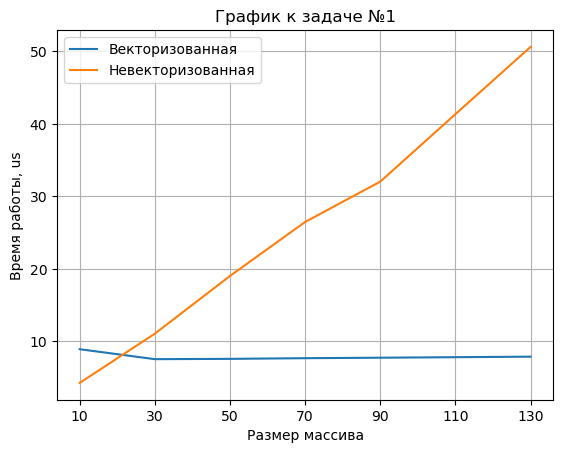

In [386]:
plt.plot(data_size_1, vect_list_1, label=u"Векторизованная")
plt.plot(data_size_1, non_vect_list_1, label=u"Невекторизованная")
plt.xticks(data_size_1)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №1')
plt.grid(True)
plt.legend()

plt.show()

In [387]:
data_size_2 = [x for x in range(1000, 10000, 1000)]    
vect_list_2 = list()
non_vect_list_2 = list()

for size in data_size_2:
    x = np.random.randint(-10, 10, (size))
    y = np.random.randint(-10, 10, (size))
    vect_time = %timeit -o are_multisets_equal_vect(x, y)
    non_vect_time = %timeit -o are_multisets_equal(x, y)
    vect_list_2.append(vect_time.average * 1000000)
    non_vect_list_2.append(non_vect_time.average * 1000000)

16.5 µs ± 14.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
14.2 µs ± 20.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
27.7 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
30.9 µs ± 70.4 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
41 µs ± 317 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
48.3 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
96.4 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
63 µs ± 90.9 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
137 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
84.1 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
171 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
102 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
202 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
117 µs ± 247 ns per loop (mean ± std. de

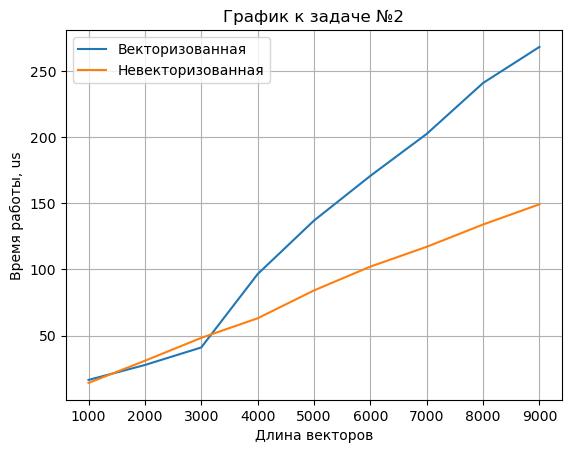

In [388]:
plt.plot(data_size_2, vect_list_2, label=u"Векторизованная")
plt.plot(data_size_2, non_vect_list_2, label=u"Невекторизованная")
plt.xticks(data_size_2)
plt.xlabel(u'Длина векторов')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №2')
plt.grid(True)
plt.legend()

plt.show()

In [389]:
data_size_3 = [x for x in range(1000, 10000, 1000)]    
vect_list_3 = list()
non_vect_list_3 = list()

for size in data_size_3:
    x = np.random.randint(-10, 10, (size))
    vect_time = %timeit -o max_after_zero_vect(x)
    non_vect_time = %timeit -o max_after_zero(x)
    vect_list_3.append(vect_time.average * 1000000)
    non_vect_list_3.append(non_vect_time.average * 1000000)

2.19 µs ± 15.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
126 µs ± 394 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.68 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
255 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.27 µs ± 9.93 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
386 µs ± 4.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.57 µs ± 31.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
515 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.08 µs ± 75.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
659 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.6 µs ± 68.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
773 µs ± 7.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
The slowest run took 95.15 times longer than the fastest. This could mean that an intermediate result is bei

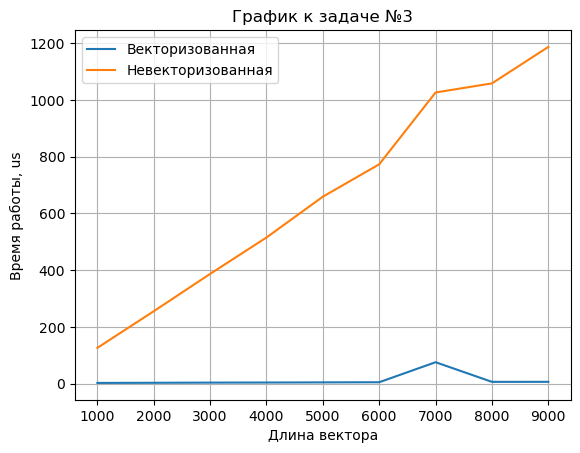

In [390]:
plt.plot(data_size_3, vect_list_3, label=u"Векторизованная")
plt.plot(data_size_3, non_vect_list_3, label=u"Невекторизованная")
plt.xticks(data_size_3)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №3')
plt.grid(True)
plt.legend()

plt.show()



In [391]:
data_size_4 = [x for x in range(10, 150, 20)]    
vect_list_4 = list()
non_vect_list_4 = list()

for size in data_size_4:
    img = np.random.randint(-2, 2, (size, size, 3))
    coeff = np.random.random(3)
    vect_time = %timeit -o convert_image_vect(img, coeff)
    non_vect_time = %timeit -o convert_image(img, coeff)
    vect_list_4.append(vect_time.average * 1000)
    non_vect_list_4.append(non_vect_time.average * 1000)

6.62 µs ± 37.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
181 µs ± 773 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
22 µs ± 367 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.65 ms ± 23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
53.1 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.5 ms ± 60.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
93.7 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.84 ms ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
152 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
14.8 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
232 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
22.2 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
321 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
31.1 ms ± 277 µs per loop (mean ± std. dev. of 7 runs

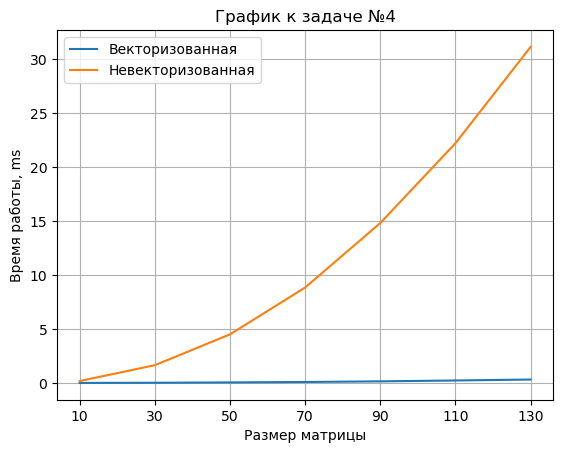

In [392]:
plt.plot(data_size_4, vect_list_4, label=u"Векторизованная")
plt.plot(data_size_4, non_vect_list_4, label=u"Невекторизованная")
plt.xticks(data_size_4)
plt.xlabel(u'Размер матрицы')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №4')
plt.grid(True)
plt.legend()

plt.show()

In [393]:
data_size_5 = [x for x in range(10, 1000, 100)]    
vect_list_5 = list()
non_vect_list_5 = list()

for size in data_size_5:
    x = np.random.randint(-5, 5, (size))
    vect_time = %timeit -o run_length_encoding_vect(x)
    non_vect_time = %timeit -o run_length_encoding(x)
    vect_list_5.append(vect_time.average * 1000000)
    non_vect_list_5.append(non_vect_time.average * 1000000)

14.1 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.73 µs ± 9.76 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
14.4 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
21.4 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
15 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
38.9 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
15.7 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
56.7 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
16.1 µs ± 24.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
75.9 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
17.3 µs ± 452 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
98.6 µs ± 555 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
18.3 µs ± 47.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
116 µs ± 716 ns per loop (mea

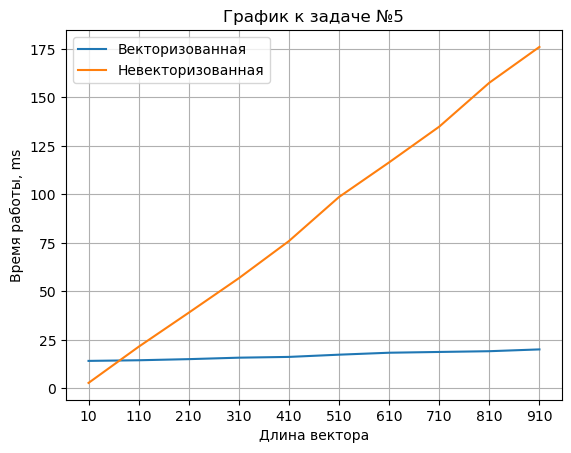

In [394]:
plt.plot(data_size_5, vect_list_5, label=u"Векторизованная")
plt.plot(data_size_5, non_vect_list_5, label=u"Невекторизованная")
plt.xticks(data_size_5)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №5')
plt.grid(True)
plt.legend()

plt.show()

In [395]:
from scipy.spatial.distance import cdist

data_size_6 = [x for x in range(10, 150, 20)]  
vect_list_6 = list()
non_vect_list_6 = list()
cdist_list = list()

for size in data_size_6:
    X = np.random.randint(-5, 5, (size, size))
    Y = np.random.randint(-5, 5, (size, size))
    vect_time = %timeit -o pairwise_distance_vect(X, Y)
    non_vect_time = %timeit -o pairwise_distance(X, Y)
    cdist_time = %timeit -o cdist(X, Y, metric='euclidean')
    vect_list_6.append(vect_time.average * 1000)
    non_vect_list_6.append(non_vect_time.average * 1000)
    cdist_list.append(cdist_time.average * 1000)

10.3 µs ± 51.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
212 µs ± 2.91 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.43 µs ± 25.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
51.2 µs ± 387 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.86 ms ± 2.94 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
16.7 µs ± 61.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
224 µs ± 3.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.23 ms ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
56.9 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
916 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
10.3 ms ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
143 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.18 ms ± 371 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.9 ms ± 150 µs per loop (mean ± std. dev.

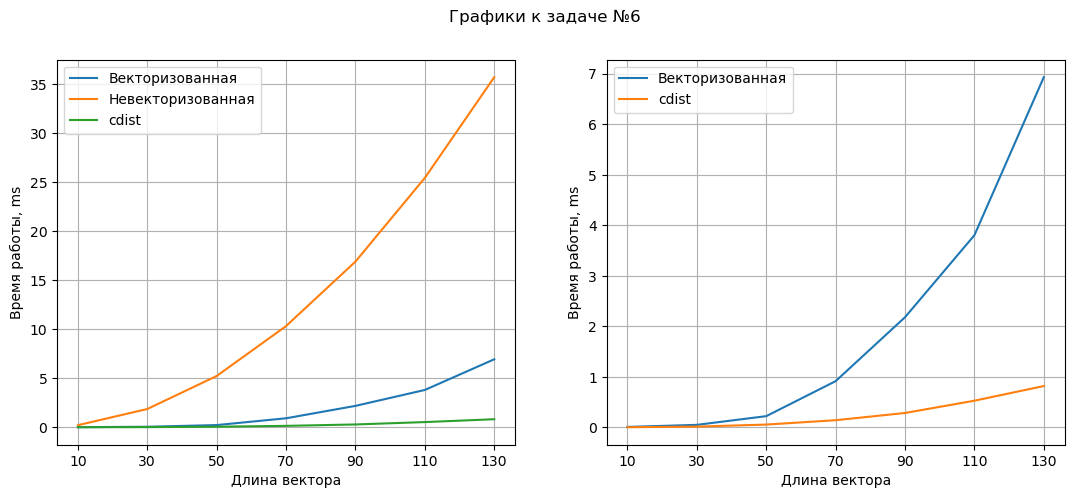

In [396]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

fig.suptitle('Графики к задаче №6')
ax1.plot(data_size_6, vect_list_6, label=u"Векторизованная")
ax1.plot(data_size_6, non_vect_list_6, label=u"Невекторизованная")
ax1.plot(data_size_6, cdist_list, label='cdist')
ax1.set_xticks(data_size_6)
ax1.set_xlabel(u'Длина вектора')
ax1.set_ylabel(u'Время работы, ms')
ax1.grid(True)
ax1.legend()

ax2.plot(data_size_6, vect_list_6, label=u"Векторизованная")
ax2.plot(data_size_6, cdist_list, label='cdist')
ax2.set_xticks(data_size_6)
ax2.set_xlabel(u'Длина вектора')
ax2.set_ylabel(u'Время работы, ms')
ax2.grid(True)
ax2.legend()


plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

<h1>Отчет о проделанной работе</h1>

Это короткий и практически **бессмысленный** отчет.

Он нужен только для тренировки работы с *markdown*.

Ура! Я могу ~как-то~ менять текст с помощью markdown!

Это просто ___замечательно___!

In [397]:
print('https://github.com/daria-petrenko/5_sem_math_methods_of_pattern_recognition/blob/master/Daria_Petrenko_task_2.ipynb')

https://github.com/daria-petrenko/5_sem_math_methods_of_pattern_recognition/blob/master/Daria_Petrenko_task_2.ipynb


In [398]:
print('Я разбирала код для графиков по ссылке выше')

Я разбирала код для графиков по ссылке выше


In [399]:
'''
Сначала этот код генерирует массив размеров массива в заданном диапазоне. (Для удобства все матрицы генерируются квадратными)
Затем для каждого из сгенерированных размеров он создает массив(матрицу), заполненный рандомными числами в указанном промежутке. 
Потом он вычисчитывает время работы векторизованной и невекторизованой функции на сгенерированных входных данных, которое
сохраняется (с домножением на константу масштабирования) в два разных массива для векторизованной и 
невекторизованной функций соответственно и с помощью функции plt.plot() строится график зависимости времени работы от 
размера массива.
'''

'\nСначала этот код генерирует массив размеров массива в заданном диапазоне. (Для удобства все матрицы генерируются квадратными)\nЗатем для каждого из сгенерированных размеров он создает массив(матрицу), заполненный рандомными числами в указанном промежутке. \nПотом он вычисчитывает время работы векторизованной и невекторизованой функции на сгенерированных входных данных, которое\nсохраняется (с домножением на константу масштабирования) в два разных массива для векторизованной и \nневекторизованной функций соответственно и с помощью функции plt.plot() строится график зависимости времени работы от \nразмера массива.\n'